In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
import pandas as pd
import seaborn as sns

# Apply the default theme
sns.set_theme()


In [180]:
jfrac = np.load('test_fractal_2.npz')['test']

In [12]:
def downsizing_sum(a, factors):    
    """
    `a` is the N-dim input array
    `factors` is the blocksize on which averaging is to be performed
    """

    factors = np.asanyarray(factors)
    sh = np.column_stack([a.shape//factors, factors]).ravel()
    b = a.reshape(sh).sum(tuple(range(1, 2*a.ndim, 2)))

    return b

In [173]:
def entropyinter(frac):
    ''' Entropie proposée par François Semecurbe
        Questions pour localiser une paire de personne 
        Mesure de la ségregation'''
    frac[:,:,0] = frac[:,:,0] / np.sum(frac[:,:,0])
    frac[:,:,1] = frac[:,:,1] / np.sum(frac[:,:,1])
    P = frac[:,:,0] * frac[:,:,1]
    P = P / np.sum(P)
    return((-np.sum(frac[:,:,0]*np.log2(frac[:,:,0])), -np.sum(frac[:,:,1]*np.log2(frac[:,:,1])) ,  -np.sum(P*np.log2(P)),-np.sum(frac[:,:,0]*np.log2(frac[:,:,1]/frac[:,:,0])) ))

In [14]:
def entropy_segregation( frac):
    ptot = np.sum(frac, axis=2)
    Prob = frac / ptot[:, :, np.newaxis]
    #print(Prob[1,1,:])
    P0 = np.sum(frac[:,:,0]) / np.sum(frac[:,:,0] +  frac[:,:,1])
    P1 = np.sum(frac[:,:,1]) / np.sum(frac[:,:,0] +  frac[:,:,1])
    Entropie_globale = -np.log2(P0)*P0 -np.log2(P1)*P1   
    return((Entropie_globale + np.sum(np.sum(np.log2(Prob) * Prob, axis=2) * ptot) / np.sum(ptot) )/Entropie_globale )

In [8]:
def renyiq(frac,q=2): 
    return(np.log(np.sum(frac[:,:,0]**q * frac[:,:,1]**q)))

### Mise en oeuvre

In [42]:
frac = jfrac[11]


In [43]:
np.max(frac[:,:,1]/(frac[:,:,0]+frac[:,:,1])*100)

99.99451

In [6]:
import matplotlib


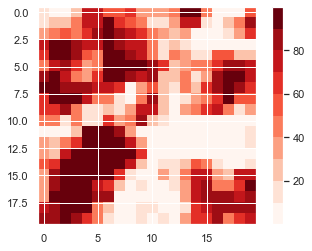

In [59]:
cmap = matplotlib.cm.get_cmap('Reds', 10)
fracd = downsizing_sum(frac,(16,16,1))
plt.imshow(fracd[:,:,1]/(fracd[:,:,0]+fracd[:,:,1])*100, cmap=cmap)
plt.colorbar()


<AxesSubplot:ylabel='Count'>

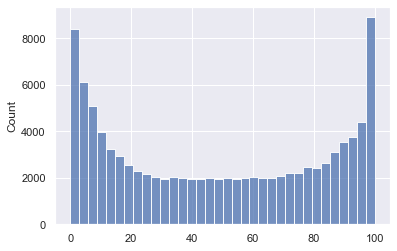

In [55]:
sns.histplot((fracd[:,:,1]/(fracd[:,:,0]+fracd[:,:,1])*100).flat)

<AxesSubplot:ylabel='Count'>

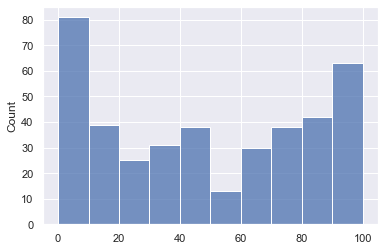

In [60]:
sns.histplot((fracd[:,:,1]/(fracd[:,:,0]+fracd[:,:,1])*100).flat)

In [47]:
entropy_segregation(fracd)

0.5272109

In [48]:
res = np.array([1,2,4,8,16,32])

In [49]:
entropies= [entropy_segregation(downsizing_sum(frac, (resi, resi, 1))) for resi in res]

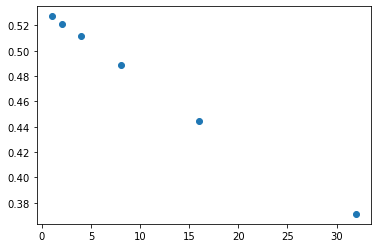

In [51]:
plt.scatter((res), entropies)

In [ ]:
reg = LinearRegression().fit(np.log2(res).reshape(-1, 1), entropies)
reg.coef_

### Variation en fonction de l

In [182]:
res = np.array([1,2,4,8])


for j in range(jfrac.shape[0]):
    frac = jfrac[j]
    frac[:,:,0] = frac[:,:,0] / np.sum(frac[:,:,0])
    frac[:,:,1] = frac[:,:,1] / np.sum(frac[:,:,1])
    entropies= [entropyinter(downsizing_sum(frac, (resi, resi, 1))) for resi in res]

    entropies = pd.DataFrame(entropies, columns=['I_0', 'I_1', 'I_01', 'Dkl'])
    entropies['lres'] = np.log2(res)
    reg0 = LinearRegression().fit(entropies.lres.values.reshape(-1, 1), entropies.I_0)
    reg1 = LinearRegression().fit(entropies.lres.values.reshape(-1, 1), entropies.I_1)
    reg01 = LinearRegression().fit(entropies.lres.values.reshape(-1, 1), entropies.I_01)
    regDkl = LinearRegression().fit(entropies.lres.values.reshape(-1, 1), entropies.Dkl)
    print(np.round(corrs[j],1),  '- I_0 : ', np.round(-reg0.coef_[0],2), '; I_1 : ', np.round(-reg1.coef_[0],2), 'I_01 : ', np.round(-reg01.coef_[0],2), 'Dkl : ', np.round(-regDkl.coef_[0],2))
    

-0.9 - I_0 :  1.73 ; I_1 :  1.67 I_01 :  1.45 Dkl :  0.41
-0.8 - I_0 :  1.75 ; I_1 :  1.68 I_01 :  1.71 Dkl :  0.27
-0.7 - I_0 :  1.75 ; I_1 :  1.66 I_01 :  1.53 Dkl :  0.24
-0.6 - I_0 :  1.67 ; I_1 :  1.72 I_01 :  1.42 Dkl :  0.35
-0.5 - I_0 :  1.78 ; I_1 :  1.72 I_01 :  1.76 Dkl :  0.37
-0.4 - I_0 :  1.79 ; I_1 :  1.8 I_01 :  1.44 Dkl :  0.19
-0.3 - I_0 :  1.67 ; I_1 :  1.84 I_01 :  1.01 Dkl :  0.11
-0.2 - I_0 :  1.9 ; I_1 :  1.89 I_01 :  1.84 Dkl :  0.15
-0.1 - I_0 :  1.94 ; I_1 :  1.95 I_01 :  1.91 Dkl :  0.05
-0.0 - I_0 :  2.0 ; I_1 :  2.0 I_01 :  2.0 Dkl :  -0.0
0.1 - I_0 :  1.94 ; I_1 :  1.95 I_01 :  1.88 Dkl :  0.05
0.2 - I_0 :  1.89 ; I_1 :  1.89 I_01 :  1.78 Dkl :  0.12
0.3 - I_0 :  1.84 ; I_1 :  1.85 I_01 :  1.81 Dkl :  0.17
0.4 - I_0 :  1.84 ; I_1 :  1.81 I_01 :  1.64 Dkl :  0.23
0.5 - I_0 :  1.8 ; I_1 :  1.8 I_01 :  1.61 Dkl :  0.27
0.6 - I_0 :  1.78 ; I_1 :  1.74 I_01 :  1.66 Dkl :  0.24
0.7 - I_0 :  1.72 ; I_1 :  1.76 I_01 :  1.78 Dkl :  0.31
0.8 - I_0 :  1.72 ; I_1 :  1

### Cascade simple

In [27]:
res = np.array([1,2,4,8,16,32])

In [43]:
jfrac = np.load('cascade_simple_log.npz')
cascade_simple = jfrac['arr_0']
cascade_log = jfrac['arr_1']

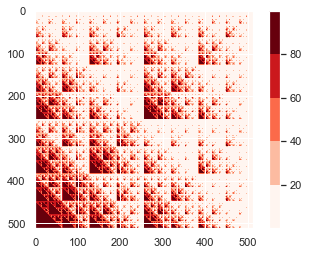

In [36]:
cmap = matplotlib.cm.get_cmap('Reds', 5)
plt.imshow(cascade_simple[:,:,1]/(cascade_simple[:,:,0]+cascade_simple[:,:,1])*100, cmap=cmap)
plt.colorbar()

In [37]:
entropies= [entropy_segregation(downsizing_sum(cascade_simple, (resi, resi, 1))) for resi in res]

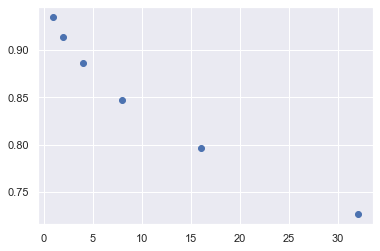

In [38]:
plt.scatter(res, entropies)

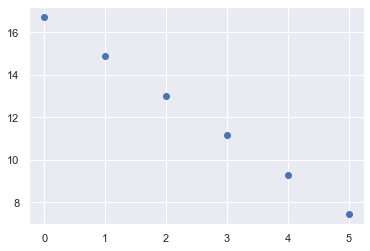

In [39]:
entropies= [entropyinter(downsizing_sum(cascade_simple, (resi, resi, 1))) for resi in res]
plt.scatter(np.log2(res), entropies)

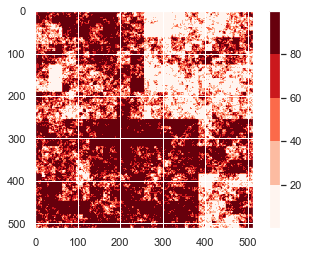

In [44]:
cmap = matplotlib.cm.get_cmap('Reds', 5)
plt.imshow(cascade_log[:,:,1]/(cascade_log[:,:,0]+cascade_log[:,:,1])*100, cmap=cmap)
plt.colorbar()

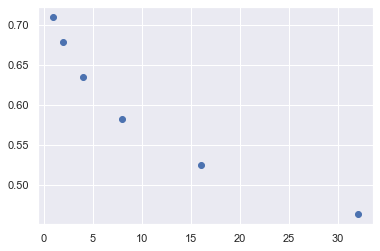

In [49]:
entropies= [entropy_segregation(downsizing_sum(cascade_log, (resi, resi, 1))) for resi in res]
plt.scatter(res, entropies)

In [150]:
jfrac = np.load('lognormalcascade.npz')['arr_0']

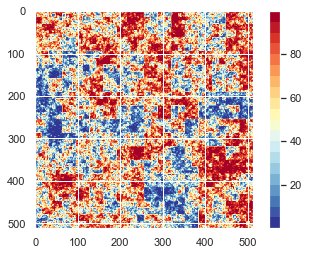

In [170]:
cascade_log=jfrac[0]
cmap = matplotlib.cm.get_cmap('RdYlBu_r', 20)
plt.imshow(cascade_log[:,:,1]/(cascade_log[:,:,0]+cascade_log[:,:,1])*100, cmap=cmap)
plt.colorbar()

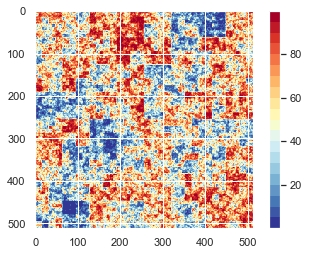

In [152]:
cascade_log=jfrac[9]
cmap = matplotlib.cm.get_cmap('RdYlBu_r', 20)
plt.imshow(cascade_log[:,:,1]/(cascade_log[:,:,0]+cascade_log[:,:,1])*100, cmap=cmap)
plt.colorbar()

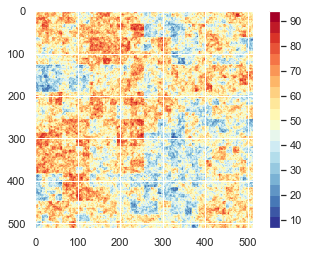

In [168]:
cascade_log=jfrac[18]
cmap = matplotlib.cm.get_cmap('RdYlBu_r', 20)
plt.imshow(cascade_log[:,:,1]/(cascade_log[:,:,0]+cascade_log[:,:,1])*100, cmap=cmap)
plt.colorbar()

In [169]:
cascade_log[:,:,1]/(cascade_log[:,:,0]+cascade_log[:,:,1])*100

array([[47.3160742 , 48.3260658 , 67.08788134, ..., 63.76951058,
        53.78396568, 43.68476383],
       [56.05180592, 45.45582355, 59.62206316, ..., 59.44756429,
        44.62986272, 54.84929628],
       [59.63922254, 66.36799502, 67.45675385, ..., 45.52339936,
        53.3309737 , 40.80830678],
       ...,
       [24.42091902, 23.43833236, 29.39392428, ..., 55.96172247,
        39.82255295, 37.71593705],
       [40.08564132, 29.37761437, 26.24992887, ..., 57.41484092,
        40.49609885, 46.22669034],
       [29.45949227, 33.58457183, 25.86993956, ..., 48.42422695,
        42.67833557, 40.0109256 ]])

In [157]:
cascade_log[:,:,1]/(cascade_log[:,:,0]+cascade_log[:,:,1])*100

array([[50.00000009, 50.00000041, 50.00000052, ..., 50.00000012,
        49.99999874, 49.99999901],
       [49.99999976, 50.00000023, 50.0000006 , ..., 49.99999998,
        49.99999868, 49.99999828],
       [50.00000017, 50.00000089, 50.0000025 , ..., 49.99999981,
        49.99999981, 50.00000016],
       ...,
       [49.99999962, 49.99999996, 50.00000026, ..., 49.99999915,
        49.99999939, 49.99999976],
       [50.00000071, 50.00000106, 49.99999973, ..., 49.99999848,
        49.99999876, 49.99999935],
       [50.00000167, 50.00000098, 49.99999981, ..., 49.99999916,
        49.99999908, 49.99999918]])

In [176]:
res = np.array([1,2,4,8,16,32])
corrs = np.arange(-0.9,1.1,0.1)

for j in range(jfrac.shape[0]):
    cascade_log = jfrac[j]
    entropies= [entropyinter(downsizing_sum(cascade_log, (resi, resi, 1))) for resi in res]
    entropies = pd.DataFrame(entropies, columns=['I_0', 'I_1', 'I_01', 'Dkl'])
    entropies['lres'] = np.log2(res)
    reg0 = LinearRegression().fit(entropies.lres.values.reshape(-1, 1), entropies.I_0)
    reg1 = LinearRegression().fit(entropies.lres.values.reshape(-1, 1), entropies.I_1)
    reg01 = LinearRegression().fit(entropies.lres.values.reshape(-1, 1), entropies.I_01)
    regDkl = LinearRegression().fit(entropies.lres.values.reshape(-1, 1), entropies.Dkl)
    print(np.round(corrs[j],1),  '- I_0 : ', np.round(-reg0.coef_[0],2), '; I_1 : ', np.round(-reg1.coef_[0],2), 'I_01 : ', np.round(-reg01.coef_[0],2), 'Dkl : ', np.round(-regDkl.coef_[0],2))

-0.9 - I_0 :  1.83 ; I_1 :  1.83 I_01 :  1.97 Dkl :  0.63
-0.8 - I_0 :  1.83 ; I_1 :  1.83 I_01 :  1.94 Dkl :  0.62
-0.7 - I_0 :  1.83 ; I_1 :  1.84 I_01 :  1.9 Dkl :  0.59
-0.6 - I_0 :  1.83 ; I_1 :  1.83 I_01 :  1.88 Dkl :  0.54
-0.5 - I_0 :  1.83 ; I_1 :  1.83 I_01 :  1.83 Dkl :  0.51
-0.4 - I_0 :  1.83 ; I_1 :  1.83 I_01 :  1.81 Dkl :  0.48
-0.3 - I_0 :  1.84 ; I_1 :  1.84 I_01 :  1.78 Dkl :  0.43
-0.2 - I_0 :  1.83 ; I_1 :  1.83 I_01 :  1.74 Dkl :  0.4
-0.1 - I_0 :  1.83 ; I_1 :  1.83 I_01 :  1.68 Dkl :  0.37
-0.0 - I_0 :  1.79 ; I_1 :  1.83 I_01 :  1.66 Dkl :  0.37
0.1 - I_0 :  1.83 ; I_1 :  1.84 I_01 :  1.63 Dkl :  0.3
0.2 - I_0 :  1.83 ; I_1 :  1.84 I_01 :  1.61 Dkl :  0.27
0.3 - I_0 :  1.83 ; I_1 :  1.83 I_01 :  1.56 Dkl :  0.23
0.4 - I_0 :  1.83 ; I_1 :  1.83 I_01 :  1.45 Dkl :  0.2
0.5 - I_0 :  1.83 ; I_1 :  1.83 I_01 :  1.5 Dkl :  0.17
0.6 - I_0 :  1.82 ; I_1 :  1.83 I_01 :  1.37 Dkl :  0.14
0.7 - I_0 :  1.83 ; I_1 :  1.83 I_01 :  1.47 Dkl :  0.1
0.8 - I_0 :  1.82 ; I_1 :  

In [172]:
1.82**2

3.3124000000000002

In [ ]:
I_0 :  1.4754078938394908 ; I_1 :  1.4009669126864734 I_01 :  1.2420036409111739
I_0 :  1.6017416701674199 ; I_1 :  1.3405468114762935 I_01 :  1.041776011311512
I_0 :  1.6779737836488917 ; I_1 :  1.4086287001388584 I_01 :  1.1097410742497547
I_0 :  1.7683984932689607 ; I_1 :  1.4257543341034362 I_01 :  1.2850934864801593
I_0 :  1.8376370817945908 ; I_1 :  1.3683984088885162 I_01 :  0.9801118067093578
I_0 :  1.8914556775992222 ; I_1 :  1.3901347645518258 I_01 :  1.3321640711054779
I_0 :  1.9389612805573921 ; I_1 :  1.3842617723933002 I_01 :  1.310109119223967
I_0 :  1.9731716425562227 ; I_1 :  1.343760958295816 I_01 :  1.3225978120099307
I_0 :  1.993113617067716 ; I_1 :  1.3754234799693024 I_01 :  1.364495257453579
I_0 :  1.9999999999999996 ; I_1 :  1.368595899419153 I_01 :  1.368595899419153
I_0 :  1.9931860671802597 ; I_1 :  1.384587176756648 I_01 :  1.4021891217842222
I_0 :  1.973272339812738 ; I_1 :  1.465414899722045 I_01 :  1.452957362767341
I_0 :  1.938075632413779 ; I_1 :  1.3672073848009054 I_01 :  1.3349855141473854
I_0 :  1.8925074471960477 ; I_1 :  1.4025199436787483 I_01 :  1.1888039546261335
I_0 :  1.832486827036566 ; I_1 :  1.4051050096082893 I_01 :  1.2561399963230095
I_0 :  1.7518693427945253 ; I_1 :  1.4118504880863425 I_01 :  1.1829405229308676
I_0 :  1.6848353686218136 ; I_1 :  1.3818528554677292 I_01 :  1.2161563862452318
I_0 :  1.5993153439636656 ; I_1 :  1.3762650644682906 I_01 :  1.1359048704406207
I_0 :  1.4871728258133705 ; I_1 :  1.4226428141323144 I_01 :  1.104780790257362


In [74]:
entropies= [entropyinter(downsizing_sum(cascade_log, (resi, resi, 1))) for resi in res]
entropies = pd.DataFrame(entropies, columns=['I_0', 'I_1', 'I_01'])
entropies['lres'] = np.log2(res)
reg0 = LinearRegression().fit(entropies.lres.values.reshape(-1, 1), entropies.I_0)
reg1 = LinearRegression().fit(entropies.lres.values.reshape(-1, 1), entropies.I_1)
reg01 = LinearRegression().fit(entropies.lres.values.reshape(-1, 1), entropies.I_01)
print('I_0 : ', reg0.coef_[0], '; I_1 : ', reg1.coef_[0], 'I_01 : ', reg01.coef_[0])

I_0 :  -1.8320863337057116 ; I_1 :  -1.4080411017542172 I_01 :  -1.3401554933188715


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='lres', ylabel='I_01'>

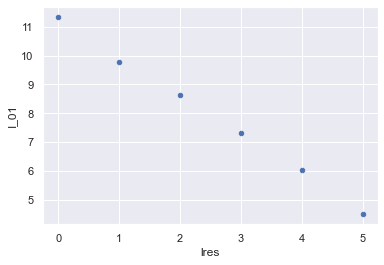

In [64]:
entropies.plot.scatter('lres', 'I_01')

In [56]:
plt.scatter(np.log2(res), entropies)
reg = LinearRegression().fit(np.log2(res).reshape(-1, 1), entropies)
reg.coef_

,I_0,I_1,I_01
0,16.612123,11.909021,11.352828
1,14.743045,10.365122,9.788845
2,12.909726,8.996144,8.627296
3,11.088768,7.612704,7.330463
4,9.272122,6.163357,6.026423
5,7.434264,4.850480,4.488560
